# DESCRIPTION

Objective:  Use data to understand what factors affect the number of bike trips. Make a predictive model to predict the number of trips in a particular hour slot, depending on the environmental conditions.

## Problem Statement:

Lyft, Inc. is a transportation network company based in San Francisco, California and operating in 640 cities in the United States and 9 cities in Canada. It develops, markets, and operates the Lyft mobile app, offering car rides, scooters, and a bicycle-sharing system. It is the second largest rideshare company in the world, second to only Uber.

Lyft’s bike-sharing service is also among the largest in the USA. Being able to anticipate demand is extremely important for planning of bicycles, stations, and the personnel required to maintain these. This demand is sensitive to a lot of factors like season, humidity, rain, weekdays, holidays, and more. To enable this planning, Lyft needs to rightly predict the demand according to these factors.

### Domain: General

### Analysis to be done: Rightly predict the bike demand

### Content: Dataset: Lyft bike-sharing data (hour.csv)

### Fields in the data:

- instant: record index

- dteday: date

- season: season (1:spring, 2:summer, 3:fall, 4:winter)

- yr: year (0: 2011, 1: 2012)

- mnth: month (1 to 12)

- hr: hour (0 to 23)

- holiday : whether the day is a holiday or not

- weekday : day|| of the week

- workingday : if the day is neither weekend nor a holiday is 1, otherwise is 0

- weathersit : 

- 1: Clear, Few clouds, Partly cloudy

- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds

- 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog

- temp : normalized temperature in Celsius; the values are divided to 41 (max)

- atemp: normalized temperature felt in Celsius; the values are divided to 50 (max)

- hum: normalized humidity; the values are divided to 100 (max)

- windspeed: normalized wind speed; the values are divided to 67 (max)

- casual: count of casual users

- registered: count of registered users

- cnt: count of total rental bikes including both casual and registered

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [46]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
path='./hour.csv'

In [ ]:
df=pd.read_csv(path)

Checking for null values and sanitizing the dataset 

In [ ]:
df.isnull().any()

As mentioned in the description cnt column is result of sum of casual and registered columns if there are records which doesnt satisfy this condition, then those have to further analysed to decide whether to discard them or let them remain in the dataset

In [ ]:
(df.casual+df.registered==df.cnt).value_counts()

Analysing mnth column to check if the values are in the range 1-12 

In [ ]:
df.mnth.value_counts().index

Analysing hr column 

In [ ]:
# values must be either from 1-24 or 0-23 which represen number of hrs in day 
df.hr.value_counts().index

In [ ]:
df.count

from the above code we understand that number of rows are 17379 so we can use this to remove the columns which are unique Identifier and will not serve our purpose . The columns that have 17379 unique values is the one which can be removed. Also as mentioned in the description instant column seems to be the one so lets test it before we remove it 

In [ ]:
df.instant.value_counts()
#this column can be dropped as it is unique identifier

In [ ]:
df.drop(['instant'],axis=1,inplace=True)

In [ ]:
df

We can also further remove casual and registered columns as we have cnt attribute which make those columns redundant

In [13]:
df.drop(['casual','registered'],axis=1,inplace=True)

In [14]:
df

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


as we already have month and weekday columns we may not need dteday so let remove it 

In [15]:
df.drop(['dteday'],axis=1,inplace=True)

In [16]:
df

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


Now that we have limited number of columns let try and analyse them 
let us use describe method of pandas to look at numerical columns

In [17]:
df.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


Let us now look at some of the numerical columns and there distribution 
let us start with temp column 

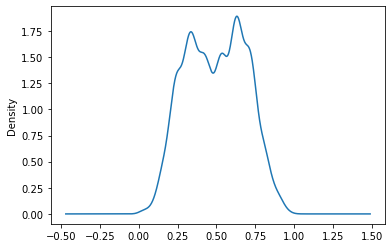

In [18]:
df.temp.plot.density()
# plot almost seems to be normally distibuted

Now let us look for outliers by plotting the box plot

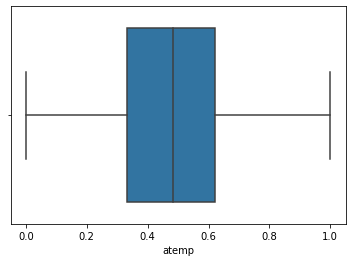

In [19]:
# let us use seaborn for plotting box plot
import seaborn as sns 
sns.boxplot(df.atemp)
# there are not outlier which can be seen in below plot

Now let us have a look at humidity column (hum column)

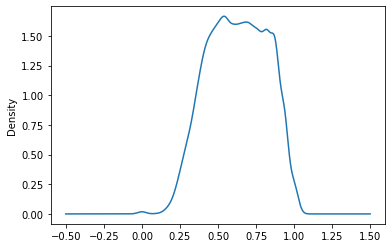

In [20]:
df.hum.plot.density()
# although the plot seems to be normally distributed let us analyse further to know if it is really normal 

let us try and plot histogram to see if there are any abnormal values 

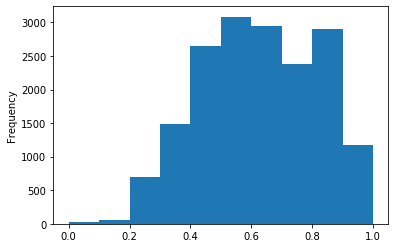

In [21]:
df.hum.plot.hist()
# this plot seem to be ohk we don't actually see any abnormal values present 

Also let us plot density plots for other numerical columns to see their distribution
Let us do it for cnt and windspeed columns

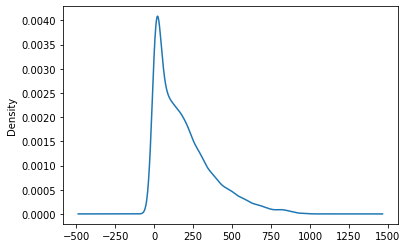

In [22]:
df.cnt.plot.density()

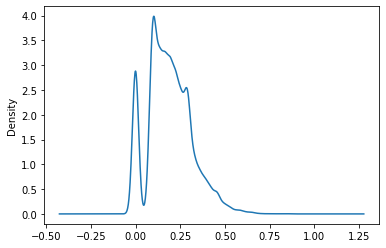

In [23]:
df.windspeed.plot.density()

Both the above columns appear to be not so normally distributed and there is little skewness as seen in the plots

Let us now plot box plots to observe the outliers

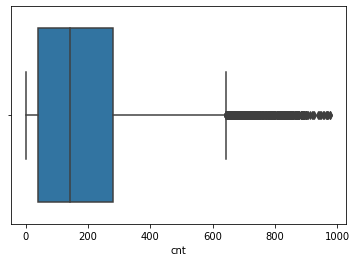

In [24]:
sns.boxplot(df.cnt)

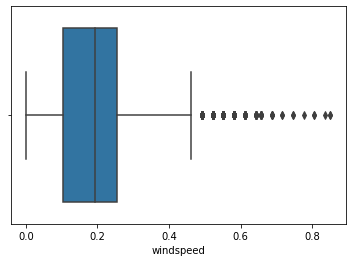

In [25]:

sns.boxplot(df.windspeed)

as seen in the above graphs there are outliers which are to be handled

Let us now handle the outliers

In [26]:
# let us look at quantiles 10 25 70 90 95 99
df.cnt.quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99])

0.10      9.00
0.25     40.00
0.50    142.00
0.70    244.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: cnt, dtype: float64

In [27]:
# let discard all the columns that have value of cnt > 563

In [28]:
df = df[df.cnt < 563].copy()

In [29]:
df

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


Let us also see further association this column has with other columns

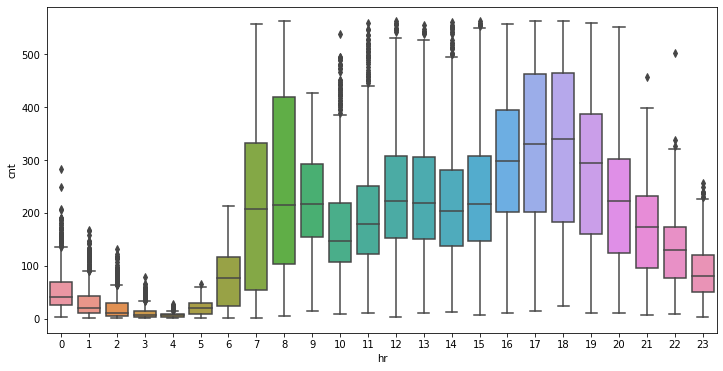

In [30]:
plt.figure(figsize=[12,6])
sns.boxplot("hr", "cnt", data=df)


It is evident that the peak hours have higher upper quartile range could be because most passenger travel to workspace during these hours

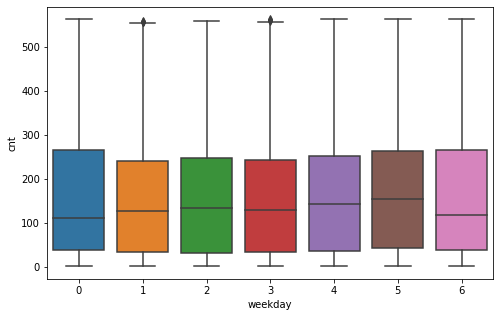

In [31]:
plt.figure(figsize=[8,5])
sns.boxplot("weekday", "cnt", data=df)


By dividing months in year as quaters we get seasons (1:spring, 2:summer, 3:fall, 4:winter) in following order



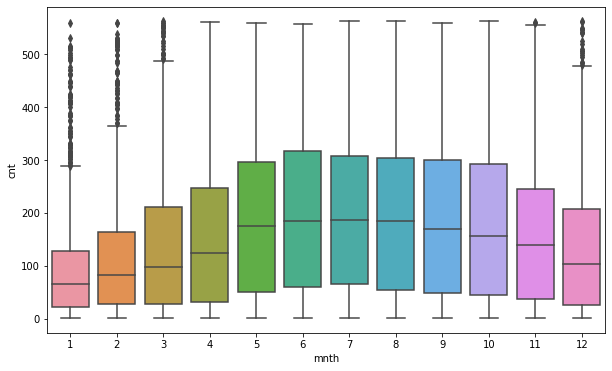

In [32]:
plt.figure(figsize=[10,6])
sns.boxplot("mnth", "cnt", data=df)


end of winter/ early spring months have the least bike riding instances 

Let us look at the same using season column 

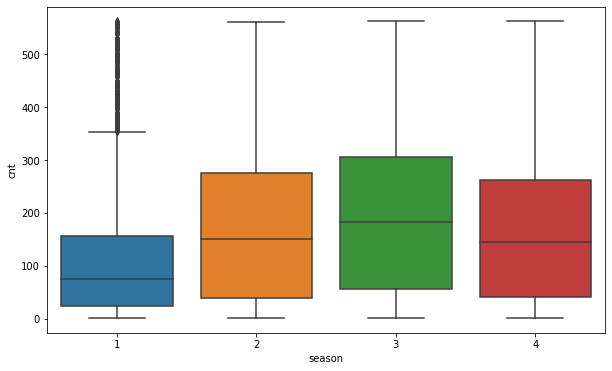

In [33]:
plt.figure(figsize=[10,6])
sns.boxplot("season", "cnt", data=df)


Fall seems to be preffered season for bike rides

In [39]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed']
corrs = df[num_vars].corr()


In [40]:
corrs

,temp,atemp,hum,windspeed
temp,1.000000,0.988218,-0.042603,-0.033209
atemp,0.988218,1.000000,-0.025747,-0.073985
hum,-0.042603,-0.025747,1.000000,-0.288648
windspeed,-0.033209,-0.073985,-0.288648,1.000000


Let us now create heatmap using this corrrelation matrix 

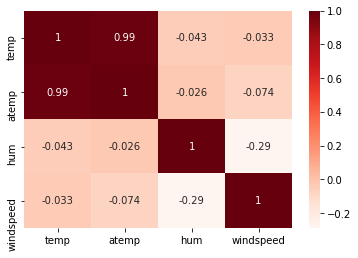

In [44]:
sns.heatmap(corrs, annot=True, cmap="Reds")

* Multi correlation doesn't seem to exists here although it is intutive that atemp and temp are related since atemp is normalized version of temp

#### Since that we had now understood to an extent of how data distributions are and outlier in dataset and also had checked the sanity let us now go ahead with further preprocessing

Now that we have processed the numerical columns Letus also look at catogerical columns and let us try to club the values that doesn't seem significant

In [47]:
# since we have seen in the earlier plot that months 5-9 have similar kind of values we have clubed them into single value 5
df.mnth[df.mnth.isin([5,6,7,8,9])] = 5
np.unique(df.mnth)


array([ 1,  2,  3,  4,  5, 10, 11, 12], dtype=int64)

Also let us club the values for hr column by replacing values between 0-5 with  0 and 11-15: 11,

In [57]:
df.hr[df.hr.isin([0,1,2,3,4,5])] = 0
df.hr[df.hr.isin([11,12,13,14,15])] = 11


In [62]:
cat_cols = ['season', 'weathersit', 'weekday', 'mnth', 'hr']
df= pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [64]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)


In [65]:
y_train = df_train.pop("cnt")
X_train = df_train

y_test = df_test.pop("cnt")
X_test = df_test


In [66]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
from sklearn.metrics import r2_score
y_train_pred= lr.predict(X_train)


In [71]:
y_test_pred= lr.predict(X_test)
r2_score(y_test, y_test_pred)


0.6633947552855373